In [3]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


Required **libraries**

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

Data Preprocessing 

In [8]:
forestfire_data = pd.read_csv("forestfires.csv")

In [9]:
forestfire_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


**Lable Encoding**

In [21]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
forestfire_data['size_category'] = LE.fit_transform(forestfire_data['size_category'])
forestfire_data['month'] = LE.fit_transform(forestfire_data['month'])
forestfire_data['day'] = LE.fit_transform(forestfire_data['day'])

In [22]:
forestfire_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
list(forestfire_data)

['month',
 'day',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'temp',
 'RH',
 'wind',
 'rain',
 'area',
 'dayfri',
 'daymon',
 'daysat',
 'daysun',
 'daythu',
 'daytue',
 'daywed',
 'monthapr',
 'monthaug',
 'monthdec',
 'monthfeb',
 'monthjan',
 'monthjul',
 'monthjun',
 'monthmar',
 'monthmay',
 'monthnov',
 'monthoct',
 'monthsep',
 'size_category']

In [29]:
forestfire_data.shape

(517, 31)

# split into input (X) and output (Y) variables

In [31]:
X = forestfire_data.iloc[:,0:30]

In [33]:
X.shape

(517, 30)

In [35]:
Y = forestfire_data["size_category"]

In [36]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

 create model

In [37]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [38]:
model = Sequential()
model.add(Dense(45,input_dim=30,  activation='relu')) #input layer
model.add(Dense(1, activation='sigmoid')) #output layer

Compile model

In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Fitting The Model

In [40]:
history = model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
35/35 [==============================] - 1s 10ms/step - loss: 8.5475 - accuracy: 0.6214 - val_loss: 4.0279 - val_accuracy: 0.6257
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 2.1308 - accuracy: 0.6734 - val_loss: 3.4053 - val_accuracy: 0.6667
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 0.9636 - accuracy: 0.7197 - val_loss: 1.8294 - val_accuracy: 0.7544
Epoch 4/100
35/35 [==============================] - 0s 5ms/step - loss: 0.5983 - accuracy: 0.7688 - val_loss: 1.8354 - val_accuracy: 0.7895
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4719 - accuracy: 0.8295 - val_loss: 0.9954 - val_accuracy: 0.7485
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4215 - accuracy: 0.8497 - val_loss: 0.9234 - val_accuracy: 0.8129
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 0.3949 - accuracy: 0.8382 - val_loss: 0.7293 - val_accuracy: 0.8070
Epoch 8/100


# Evaluate the model

In [41]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.0396 - accuracy: 0.9865
accuracy: 98.65%


  Visualize training history

  list all data in history

In [47]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

 summarize history for accuracy

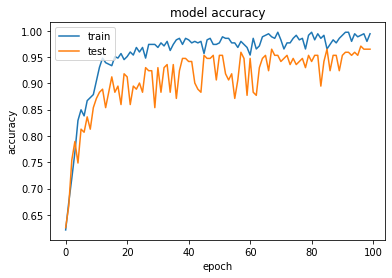

In [49]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

summarize history for loss

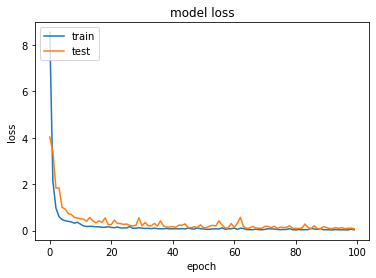

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

THE DATA SET for nural net works OF forestfire.csv ==>>ACCURACY SCORE IS **98.65%** SO THE FOREST BURNED AREA OF THE FOREST IS **98.65%**

